In [1]:
import pandas as pd
import cv2
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog

In [2]:
# Ekstrak fitur warna dari gambar
def extract_color_histogram(image_path, bins=(8, 8, 8)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [3]:
def process_image_folder(folder_path, df):
    features = []
    labels = []
    expected_columns = ['filename', 'apple', 'avocado', 'capsicum', 'mango', 'orange', 'rockmelon', 'strawberry']
    
    # Ilangin whitespace dr nama kolom
    df.columns = df.columns.str.strip()
    
    # Validasi kolom
    if not all(col in df.columns for col in expected_columns):
        print("Kolom dalam DataFrame:", df.columns)
        print("Kolom yang diharapkan:", expected_columns)
        raise ValueError("Dataframe tidak memiliki kolom yang diharapkan.")
    
    for index, row in df.iterrows():
        image_path = os.path.join(folder_path, row['filename'])
        if not os.path.exists(image_path):
            print(f'Warning: Image {image_path} does not exist.')
            continue
        label = row[1:].idxmax().strip()
        hist = extract_color_histogram(image_path)
        features.append(hist)
        labels.append(label)
    return np.array(features), np.array(labels)

In [4]:
def predict_image_label(image_path, model, bins=(8, 8, 8)):
    print("Predicting image:", image_path)
    if not os.path.exists(image_path):
        return "Image path does not exist."
    
    # Menampilkan gambar
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    
    hist = extract_color_histogram(image_path, bins)
    hist = hist.reshape(1, -1)
    prediction = model.predict(hist)
    prediction_proba = model.predict_proba(hist)
    
    predicted_class = prediction[0]
    confidence = max(prediction_proba[0])
    
    return predicted_class, confidence

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Validation Accuracy: 0.79
Test Accuracy: 0.72

Validation Classification Report:
               precision    recall  f1-score   support

       apple       0.86      0.46      0.60        13
     avocado       1.00      0.29      0.44         7
    capsicum       0.96      0.88      0.92        26
       mango       0.59      0.81      0.69        27
      orange       0.79      0.83      0.81        18
   rockmelon       0.81      0.93      0.87        14
  strawberry       1.00      1.00      1.00         7

    accuracy                           0.79       112
   macro avg       0.86      0.74      0.76       112
weighted avg       0.82      0.79      0.78       112

Test Classification Report:
               precision    recall  f1-score   support

       apple       1.00      0.38      0.55         8
     avocado       1.00      0.00      0.00         5
    capsicum       0.92      0.92      0.92        13
       mango 

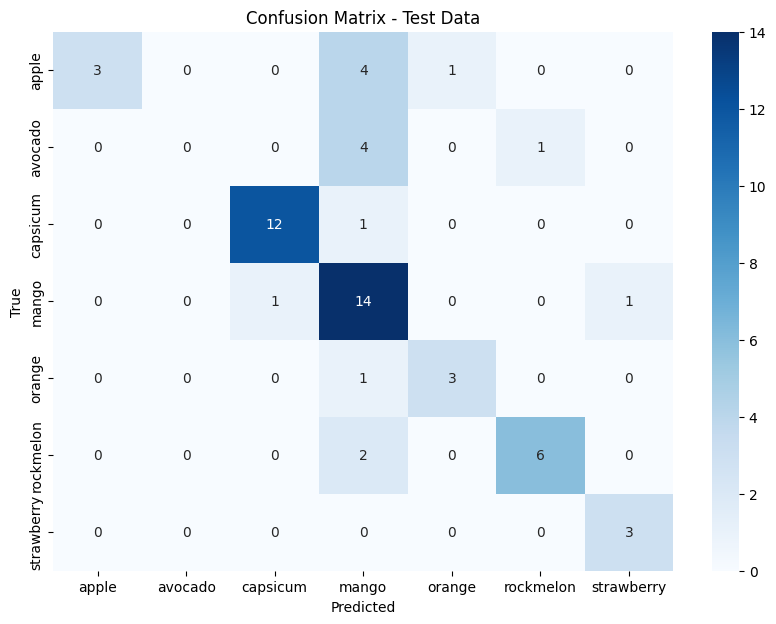

Predicting image: ../deepfruits0/test/8_png_jpg.rf.0393f9ec86426f2e6a40ec95709bc0f8.jpg


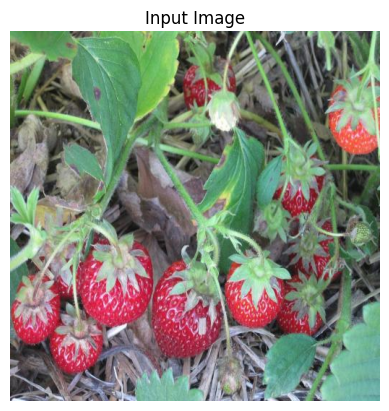

The predicted label for the image 8_png_jpg.rf.0393f9ec86426f2e6a40ec95709bc0f8.jpg is: strawberry with confidence: 0.33
Predicting image: ../deepfruits0/test/n12761284_17506_png_jpg.rf.22b9f8a36265df4a823934dfa53af3f2.jpg


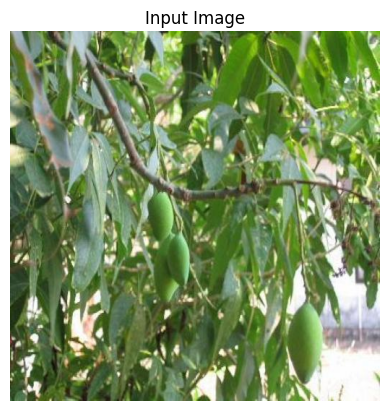

The predicted label for the image n12761284_17506_png_jpg.rf.22b9f8a36265df4a823934dfa53af3f2.jpg is: mango with confidence: 0.78
Predicting image: ../deepfruits0/test/Stanthorpe1_test_20150319T1636_pic000287_png_jpg.rf.233fb1b33deff20b947acfb74e660c10.jpg


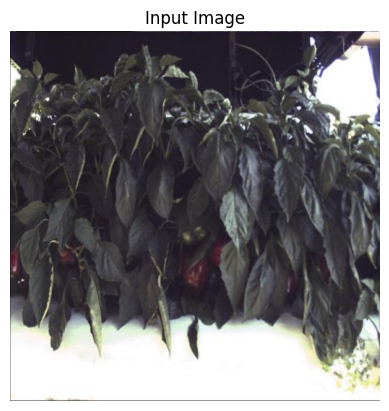

The predicted label for the image Stanthorpe1_test_20150319T1636_pic000287_png_jpg.rf.233fb1b33deff20b947acfb74e660c10.jpg is: capsicum with confidence: 0.77
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Validation Accuracy: 0.49
Test Accuracy: 0.44

Validation Classification Report:
               precision    recall  f1-score   support

       apple       0.00      0.00      0.00        13
     avocado       0.00      0.00      0.00         7
    capsicum       0.77      0.88      0.82        26
       mango       0.34      0.81      0.48        27
      orange       0.50      0.11      0.18        18
   rockmelon       0.80      0.57      0.67        14
  strawberry       0.00      0.00      0.00         7

    accuracy                           0.49       112
   macro avg       0.34      0.34      0.31       112
weighted avg       0.44      0.49      0.42       112

Test Classification Report:
               precision    recall  f1-score   support

       apple     

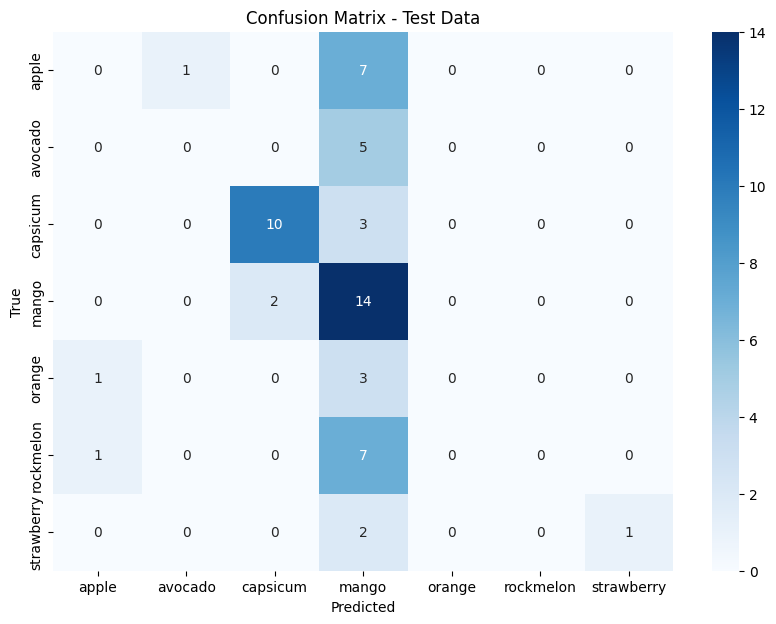

Predicting image: ../deepfruits1/test/8_png_jpg.rf.0393f9ec86426f2e6a40ec95709bc0f8.jpg


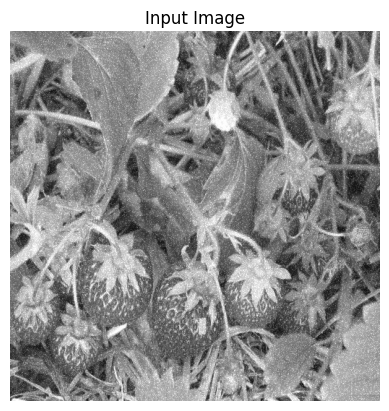

The predicted label for the image 8_png_jpg.rf.0393f9ec86426f2e6a40ec95709bc0f8.jpg is: strawberry with confidence: 0.35
Predicting image: ../deepfruits1/test/n12761284_17506_png_jpg.rf.22b9f8a36265df4a823934dfa53af3f2.jpg


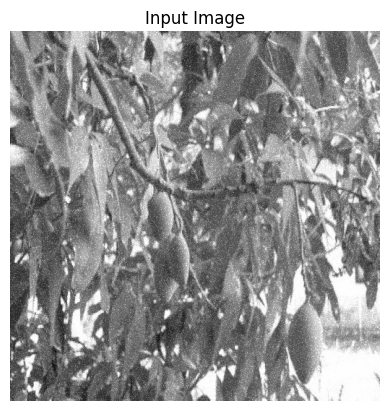

The predicted label for the image n12761284_17506_png_jpg.rf.22b9f8a36265df4a823934dfa53af3f2.jpg is: mango with confidence: 0.57
Predicting image: ../deepfruits1/test/Stanthorpe1_test_20150319T1636_pic000287_png_jpg.rf.233fb1b33deff20b947acfb74e660c10.jpg


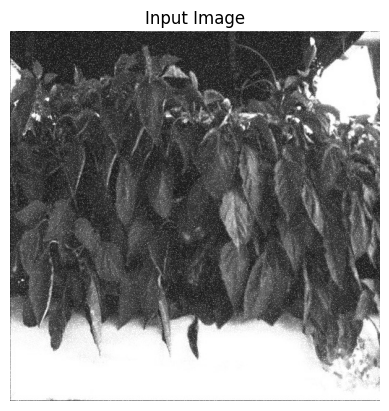

The predicted label for the image Stanthorpe1_test_20150319T1636_pic000287_png_jpg.rf.233fb1b33deff20b947acfb74e660c10.jpg is: capsicum with confidence: 0.63


In [5]:
# Mendefinisikan path folder dan menjalankan model
for i in range(2):
    # Membaca path folder
    train_folder = f'../deepfruits{i}/train'  
    valid_folder = f'../deepfruits{i}/valid'  
    test_folder = f'../deepfruits{i}/test'
    
    # Membaca file CSV
    train_df = pd.read_csv(f'../deepfruits{i}/train/_classes.csv')
    valid_df = pd.read_csv(f'../deepfruits{i}/valid/_classes.csv')
    test_df = pd.read_csv(f'../deepfruits{i}/test/_classes.csv')
    
    # # Memeriksa kolom DataFrame
    # print(f'Checking columns for dataset {i}')
    # print('Train DataFrame columns:', train_df.columns)
    # print('Valid DataFrame columns:', valid_df.columns)
    # print('Test DataFrame columns:', test_df.columns)
    
    # Memproses setiap folder gambar
    X_train, y_train = process_image_folder(train_folder, train_df)
    X_valid, y_valid = process_image_folder(valid_folder, valid_df)
    X_test, y_test = process_image_folder(test_folder, test_df)
    
    # Inisialisasi dan pelatihan model dengan GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Evaluasi model terbaik
    y_valid_pred = best_model.predict(X_valid)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    print(f'Validation Accuracy: {valid_accuracy:.2f}')

    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Test Accuracy: {test_accuracy:.2f}\n')
    
    print("Validation Classification Report:\n", classification_report(y_valid, y_valid_pred, zero_division=1))
    print("Test Classification Report:\n", classification_report(y_test, y_test_pred, zero_division=1))
    
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Test Data')
    plt.show()
    
    # Prediksi gambar baru dengan confidence score
    test_image_paths = [
        f'../deepfruits{i}/test/8_png_jpg.rf.0393f9ec86426f2e6a40ec95709bc0f8.jpg',
        f'../deepfruits{i}/test/n12761284_17506_png_jpg.rf.22b9f8a36265df4a823934dfa53af3f2.jpg',
        f'../deepfruits{i}/test/Stanthorpe1_test_20150319T1636_pic000287_png_jpg.rf.233fb1b33deff20b947acfb74e660c10.jpg'
    ]
    
    for image_path in test_image_paths:
        predicted_label, confidence = predict_image_label(image_path, best_model)
        print(f'The predicted label for the image {os.path.basename(image_path)} is: {predicted_label} with confidence: {confidence:.2f}')
